# Dataset

### PhiUSIIL Phishing URL
#### Donated on 3/3/2024

#### link: https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset

In [1]:
!pip install ucimlrepo
!pip install lightgbm

In [2]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

In [3]:
# Fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

In [5]:
X.shape

(235795, 54)

In [6]:
y.shape

(235795, 1)

In [ ]:
"""

# Check for missing values
print("\nMissing values per feature:\n", X.isnull().sum())
# If there are missing values, handle them (e.g., drop rows)
if X.isnull().sum().sum() > 0:
    X = X.dropna()
    y = y.loc[X.index]
    print("Rows with missing values dropped.")"""

In [39]:
categorical_features = ['URL', 'Domain', 'TLD', 'Title']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Create and train LightGBM classifier
clf = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100
)

In [41]:
drop_cols = ['URL', 'Domain', 'Title', 'URLCharProb', 'URLSimilarityIndex', 'LargestLineLength']
X_train = X_train.drop(columns=drop_cols)
X_test = X_test.drop(columns=drop_cols)

In [42]:
categorical_cols = [
    'IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle',
    'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
    'NoOfSelfRedirect', 'HasDescription', 'HasExternalFormSubmit',
    'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
    'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo'
]

for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [43]:
X_train['TLD'] = X_train['TLD'].astype('category')
X_test['TLD'] = X_test['TLD'].astype('category')

In [44]:
for col in categorical_cols + ['TLD']:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [45]:
clf.fit(X_train, y_train, categorical_feature=categorical_cols + ['TLD'])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 107815, number of negative: 80821
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4387
[LightGBM] [Info] Number of data points in the train set: 188636, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.571550 -> initscore=0.288180
[LightGBM] [Info] Start training from score 0.288180


LGBMClassifier(learning_rate=0.05, metric='binary_logloss', objective='binary')

In [46]:
# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [47]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")


Model Performance Metrics:
Accuracy: 0.9996
Precision: 0.9996
Recall: 0.9997
F1-score: 0.9997
AUC-ROC: 0.9999


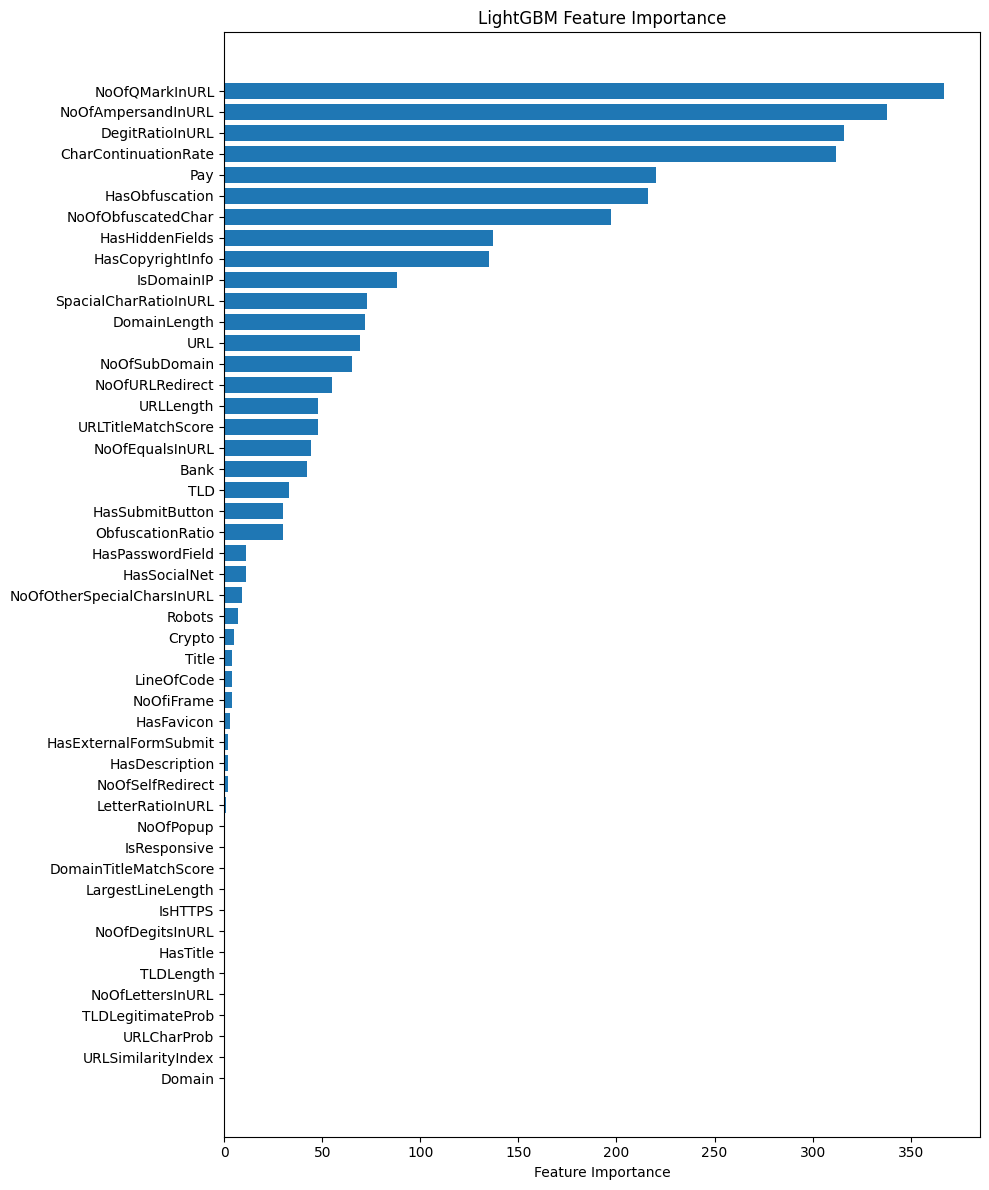

In [48]:
# Plot feature importance
plt.figure(figsize=(10, 12))
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()